In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import sparse

In [ ]:
D = 1 # dimensionality
K = 2 # number of classes

theta = np.random.randn(D+1, K)

iris = np.genfromtxt('iris_1D_2c.csv', delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
X = X.T

D = 1 # dimensionality
K = 2 # number of classes
Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (K, len(y))).toarray()

theta = np.random.randn(D+1, K)

# gradient descent loop
num_examples = X.shape[1]
learning_rate = 0.1
losses = []
num_iter = 100
for epoch in range(num_iter):
    # evaluate class scores
    scores = np.dot(theta.T, X)

    #compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=0)
    
    # compute the loss
    loss = -np.sum(Y *np.log(probs))
    losses.append(loss)
    
    dtheta = X @ (probs - Y).T

    # perform a parameter update
    theta += -learning_rate *dtheta

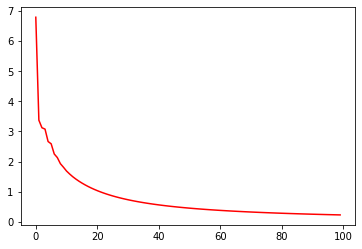

In [ ]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [ ]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

D = 1 # dimensionality
K = 2 # number of classes

theta = np.random.randn(D+1, K)
Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (K, len(y))).toarray()

# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.1

losses = []
num_iter = 1000
for epoch in range(num_iter):
    for i in range(num_examples):
        xi = X[i:i+1]
        xi = xi.T
        yi = Y[:, i:i+1]

        # evaluate class scores
        scores = np.dot(theta.T, xi)

        #compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=0)

        # compute the loss
        loss = -np.sum(yi * np.log(probs))
        losses.append(loss)

        dtheta = xi @ (probs - yi).T

        # perform a parameter update
        theta += -learning_rate *dtheta

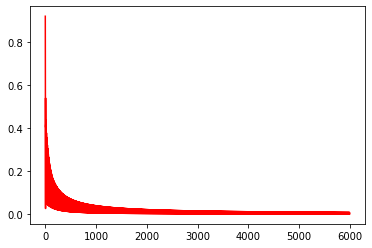

Training accuracy: 1.00


In [ ]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

# evaluate training set accuracy
scores = np.dot(theta.T, X.T)
predicted_class = np.argmax(scores, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))